In [68]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="pastel")
plt.style.use('ggplot')

In [43]:
CKD_INDIA_PATH = Path("../data/Public_Datasets/CKD_UAE_Dataset/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv")

In [44]:
df = pd.read_csv(CKD_INDIA_PATH)
df.head()

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.8,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.4,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.4,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.1,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.0,70.0,79.7,132,63,31,105,0,9


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  491 non-null    int64  
 1   AgeBaseline          491 non-null    int64  
 2   HistoryDiabetes      491 non-null    int64  
 3   HistoryCHD           491 non-null    int64  
 4   HistoryVascular      491 non-null    int64  
 5   HistorySmoking       491 non-null    int64  
 6   HistoryHTN           491 non-null    int64  
 7   HistoryDLD           491 non-null    int64  
 8   HistoryObesity       491 non-null    int64  
 9   DLDmeds              491 non-null    int64  
 10  DMmeds               491 non-null    int64  
 11  HTNmeds              491 non-null    int64  
 12  ACEIARB              491 non-null    int64  
 13  CholesterolBaseline  491 non-null    float64
 14  CreatinineBaseline   491 non-null    float64
 15  eGFRBaseline         491 non-null    flo

In [46]:
df.columns

Index(['Sex', 'AgeBaseline', 'HistoryDiabetes', 'HistoryCHD',
       'HistoryVascular', 'HistorySmoking', 'HistoryHTN ', 'HistoryDLD',
       'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB',
       'CholesterolBaseline', 'CreatinineBaseline', 'eGFRBaseline',
       'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths',
       'EventCKD35', 'TIME_YEAR'],
      dtype='object')

In [47]:
df.columns = [col.strip() for col in df.columns]

In [48]:
# Drop time based features or calculated ones
to_drop = [
    "TIME_YEAR",
    "TimeToEventMonths",
    "eGFRBaseline"
    ]

df = df.drop(columns=to_drop)

df.head()

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,sBPBaseline,dBPBaseline,BMIBaseline,EventCKD35
0,0,64,0,0,0,0,1,1,1,1,0,1,0,4.8,59.0,144,87,40,0
1,0,52,0,0,0,0,1,1,1,0,0,1,0,6.4,52.0,148,91,45,0
2,0,56,0,0,0,0,1,1,1,1,0,1,0,6.4,57.0,149,86,41,0
3,0,58,0,0,0,0,0,1,1,1,0,0,0,5.1,65.0,116,68,32,0
4,0,63,1,0,0,0,1,1,1,1,1,1,1,5.0,70.0,132,63,31,0


<Axes: xlabel='AgeBaseline', ylabel='Count'>

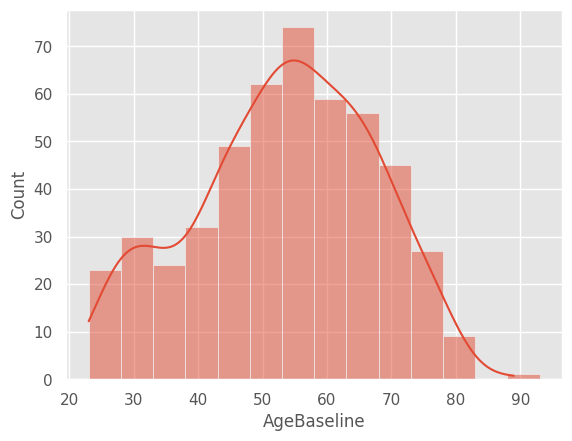

In [49]:
# Age distribution
sns.histplot(data=df, x="AgeBaseline", binwidth=5, kde=True)

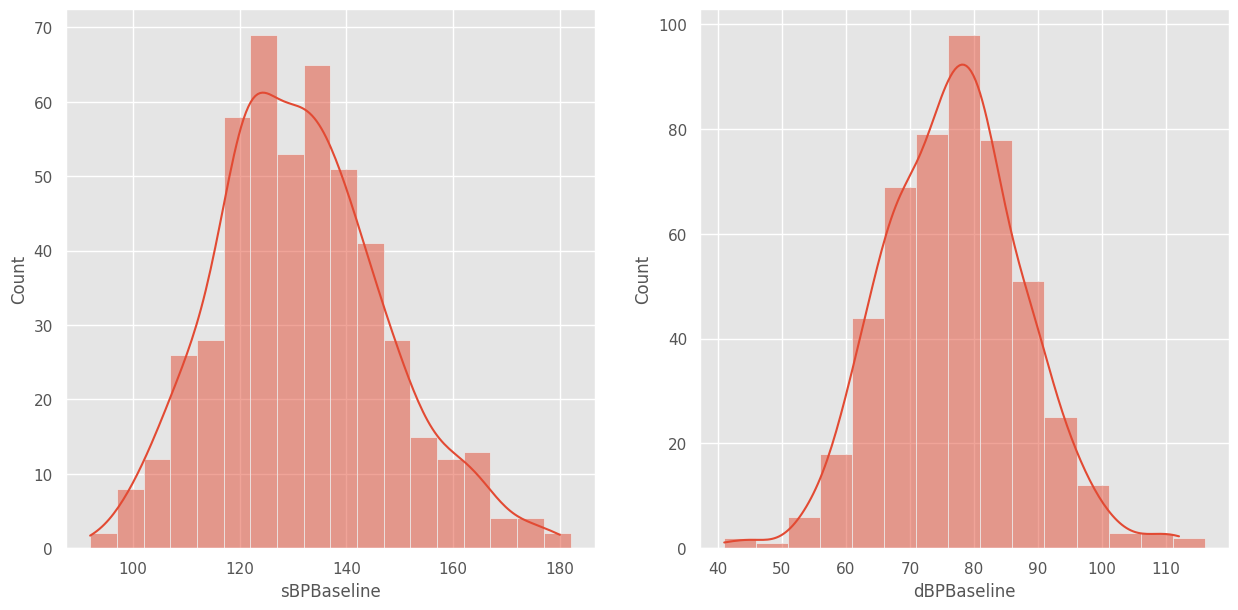

In [50]:
# Check blood pressure distribution
fig, axes = plt.subplots(1,2, figsize=(15,7))
cols = ["sBPBaseline", "dBPBaseline"]

for ax, col in zip(axes, cols):
    sns.histplot(data=df, x=col, ax=ax ,binwidth=5, kde=True);


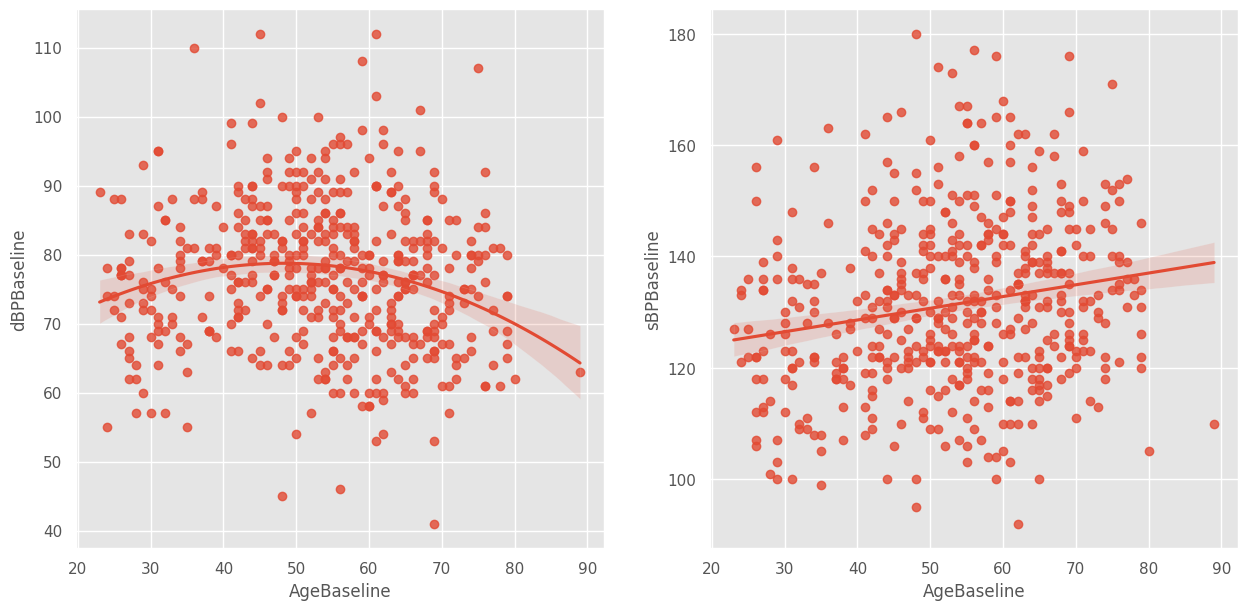

In [51]:
# Check relationship between blood pressure and age

"""
Data obtained during the Framingham Heart Study, which followed patients for 30 years, 
agreed that systolic blood pressure (SBP) shows a continuous increase between the ages of 30 and 84 years or over. 
Diastolic blood pressure (DBP), however, has a varying pattern with ageing, 
increasing until the fifth decade and slowly decreasing from the age of 60 to at least 84 years of age. 
"""

fig, axes = plt.subplots(1,2, figsize=(15,7))
sns.regplot(data=df, x="AgeBaseline", y="dBPBaseline", order=2, ax=axes[0]);
sns.regplot(data=df, x="AgeBaseline", y="sBPBaseline", order=1, ax=axes[1]);

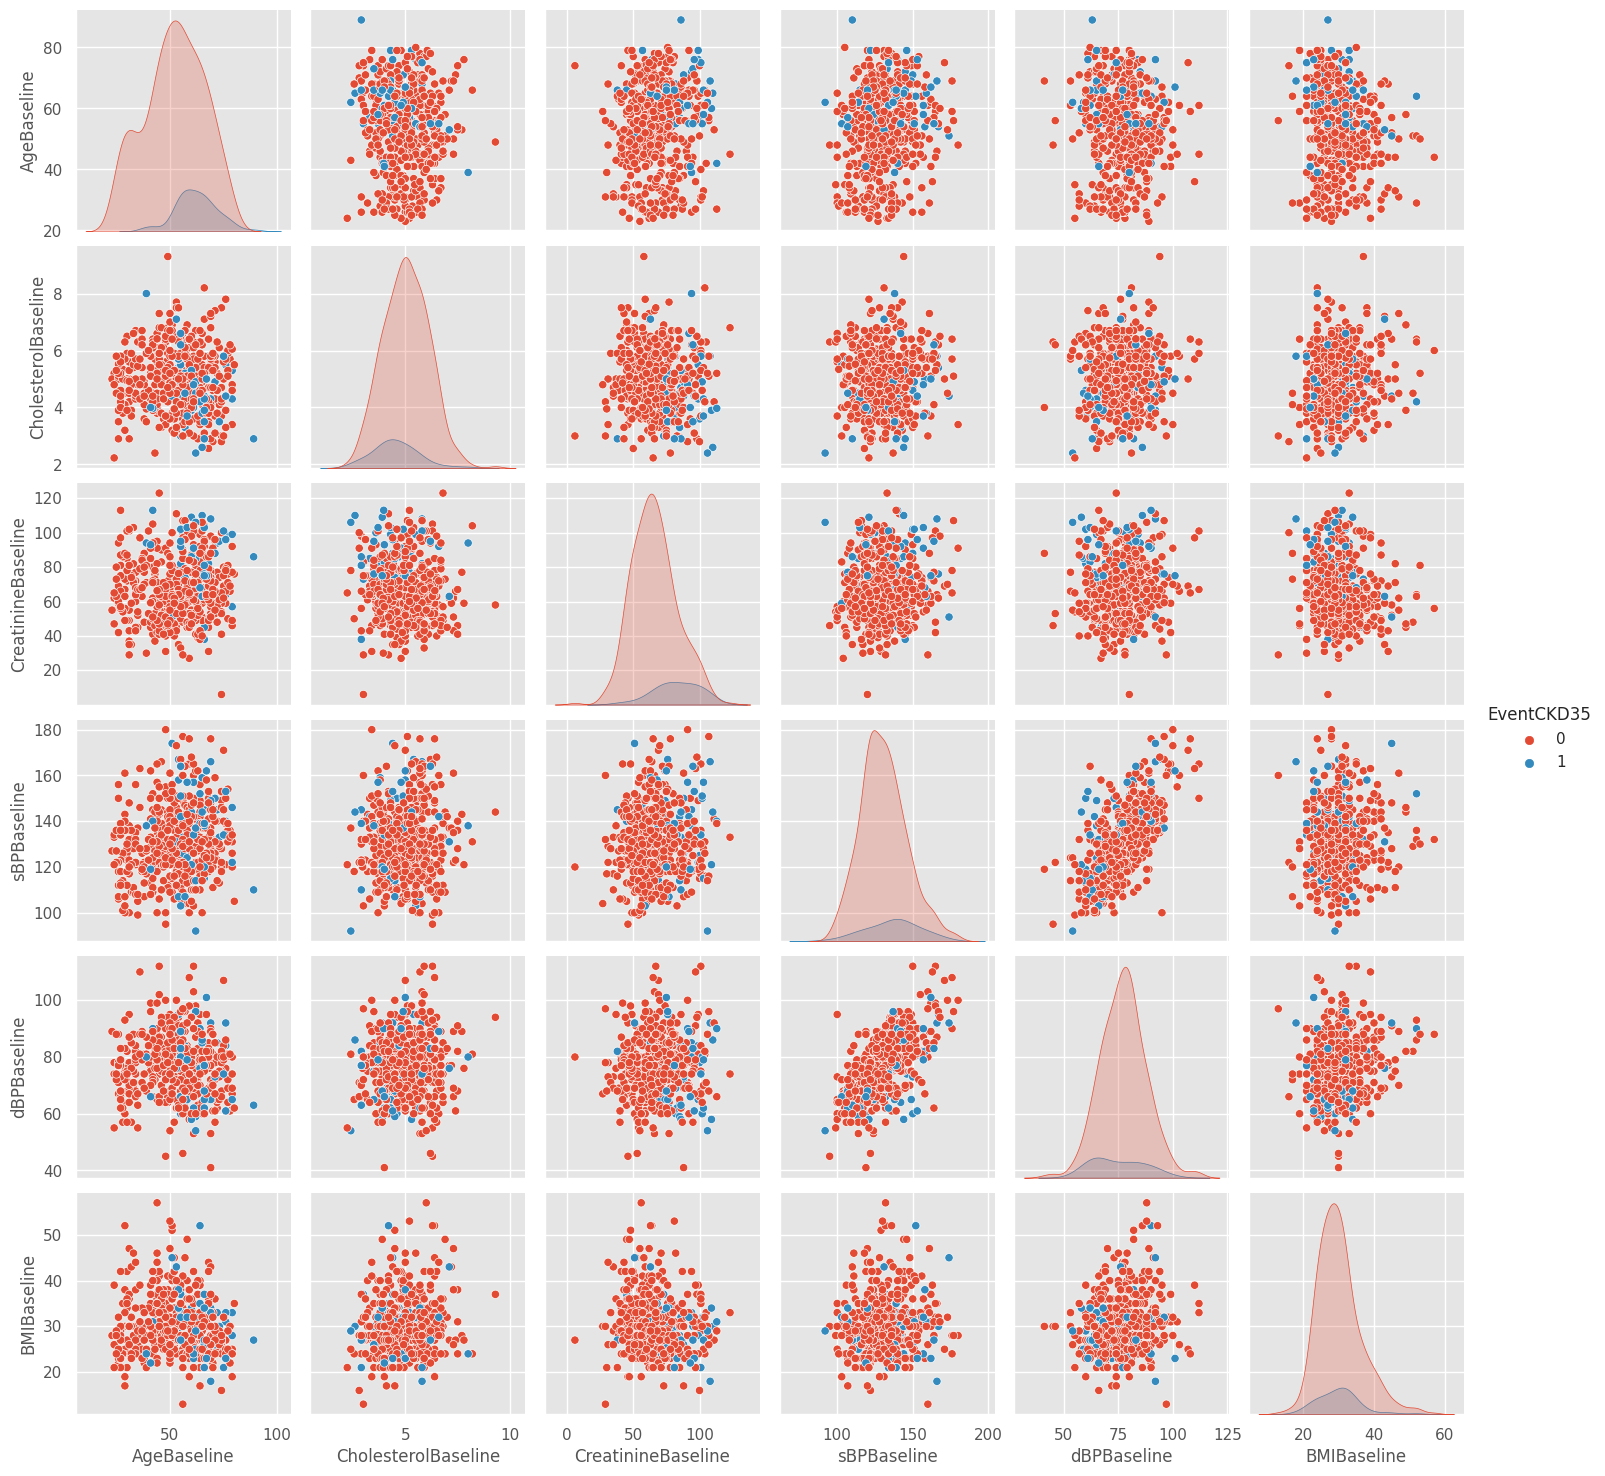

In [52]:
numeric_cols = [
    "AgeBaseline",
    "CholesterolBaseline",
    "CreatinineBaseline",
    "sBPBaseline",
    "dBPBaseline",
    "BMIBaseline"
]

sns.pairplot(data=df, vars=numeric_cols, hue="EventCKD35")

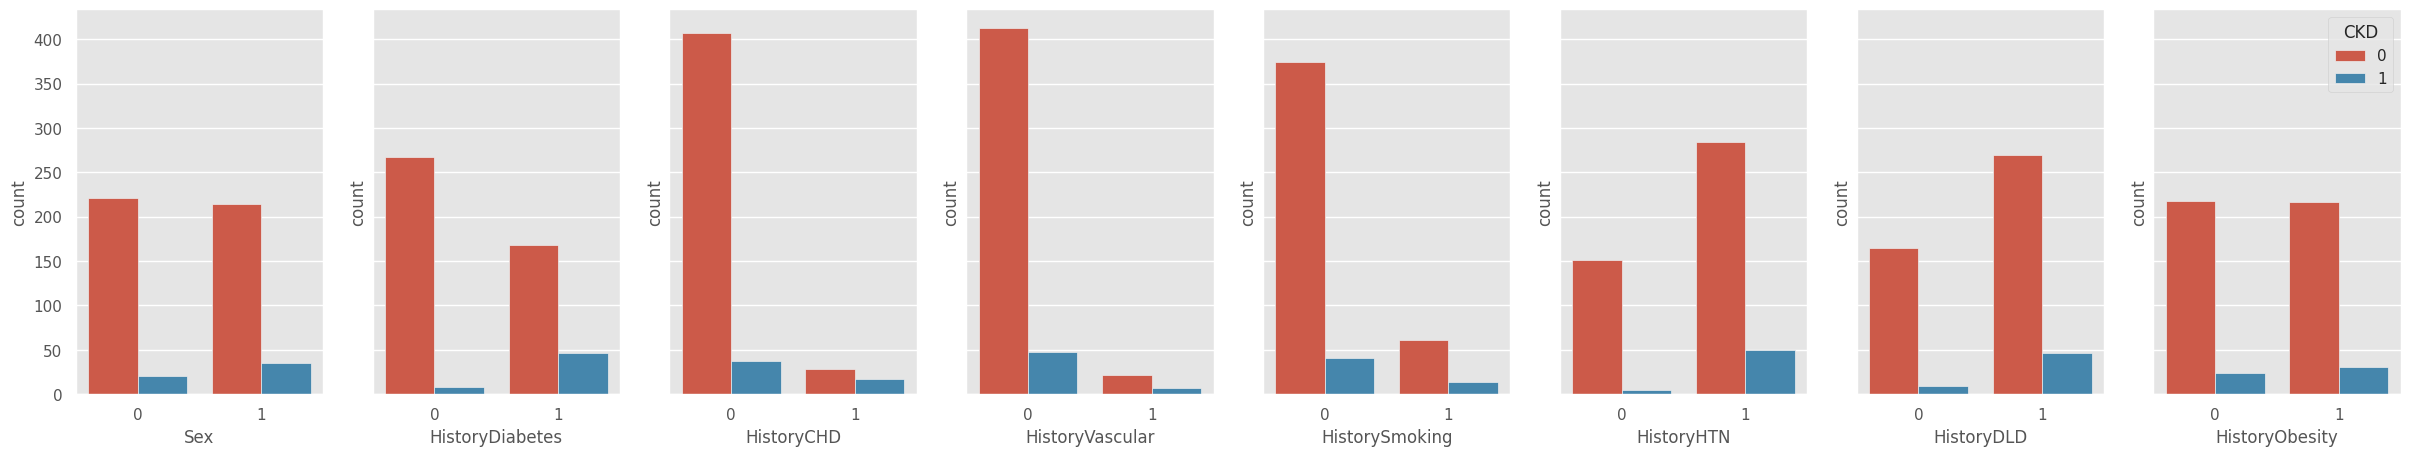

In [66]:
# Check if anemia and diabetes diagnosis make sense
cat_cols = [
    "Sex",
    "HistoryDiabetes",
    "HistoryCHD",
    "HistoryVascular",
    "HistorySmoking",
    "HistoryHTN",
    "HistoryDLD",
    "HistoryObesity"
]
fig, axes = plt.subplots(1,8, figsize=(30,5), sharey=True)
for ax, col in zip(axes, cat_cols):
    sns.countplot(data=df, x=col, hue="EventCKD35", ax=ax)
    ax.get_legend().remove()

ax.legend(title="CKD", loc="upper right");

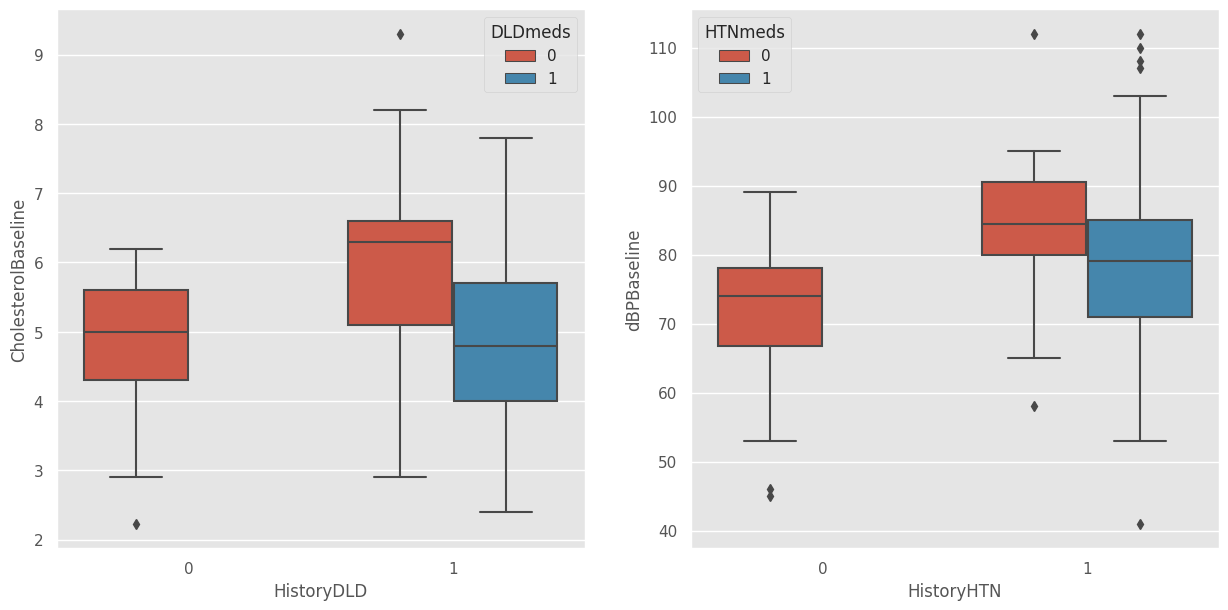

In [79]:
# Check relationship between taking medications and lab values
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(data=df, x="HistoryDLD", y="CholesterolBaseline", hue="DLDmeds", ax=axes[0])
sns.boxplot(data=df, x="HistoryHTN", y="dBPBaseline", hue="HTNmeds", ax=axes[1]);

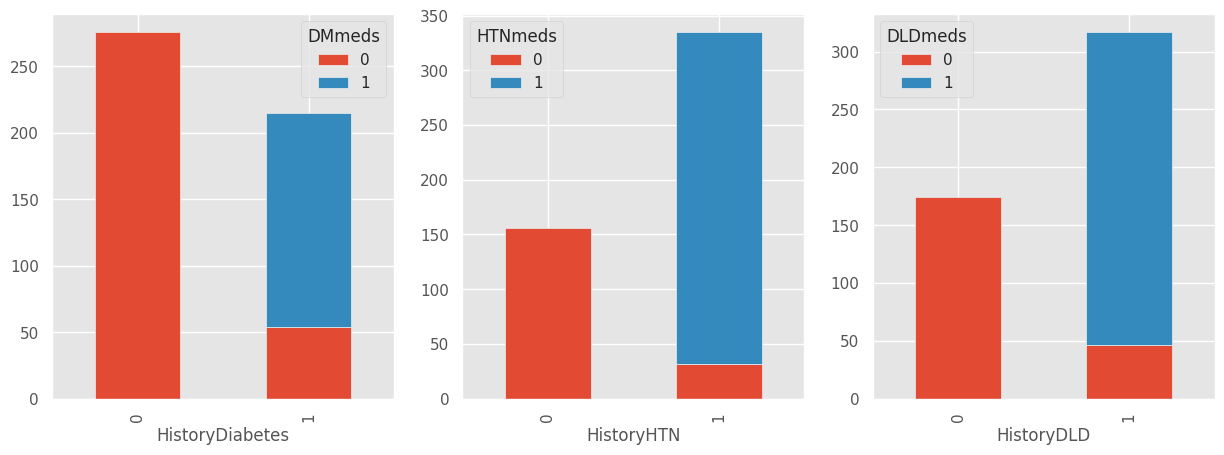

In [55]:
# Distribution of people who have a disease and if they are taking meds

fig, axes = plt.subplots(1,3, figsize=(15,5))
diseases = ["HistoryDiabetes", "HistoryHTN", "HistoryDLD"]
meds = ["DMmeds", "HTNmeds", "DLDmeds"]

for i, (disease, med) in enumerate(zip(diseases, meds)):
    df.groupby([disease, med]).size().reset_index().pivot(columns=med, index=disease, values=0).plot(kind="bar", stacked=True, ax=axes[i])

In [56]:
# Remove age outlier
#df = df.loc[df["AgeBaseline"] <= 85].copy()

### INSIGHTS:
-